## Прогнозування раку

Завантаження даних реальних пацієнтів з раком...
Дані завантажено. Тренувальний набір: 455 записів, Тестовий набір: 114 записів.

Model: Logistic Regression
Accuracy: 0.9825
ROC AUC: 0.9954
R2 Score: 0.9246
MSE: 0.0175
MAE: 0.0175


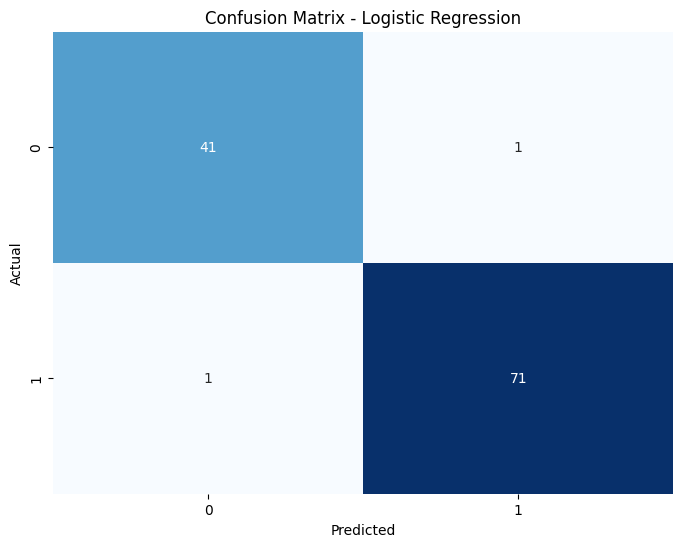

Model: Decision Tree
Accuracy: 0.9211
ROC AUC: 0.9163
R2 Score: 0.6607
MSE: 0.0789
MAE: 0.0789


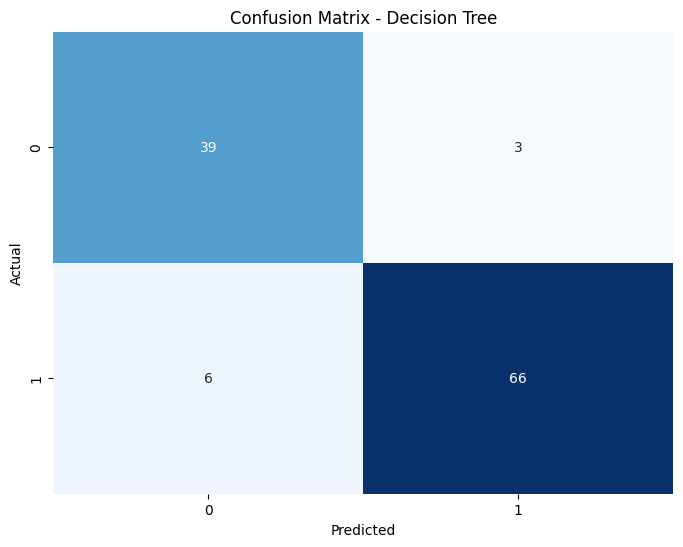

Model: Random Forest
Accuracy: 0.9561
ROC AUC: 0.9939
R2 Score: 0.8115
MSE: 0.0439
MAE: 0.0439


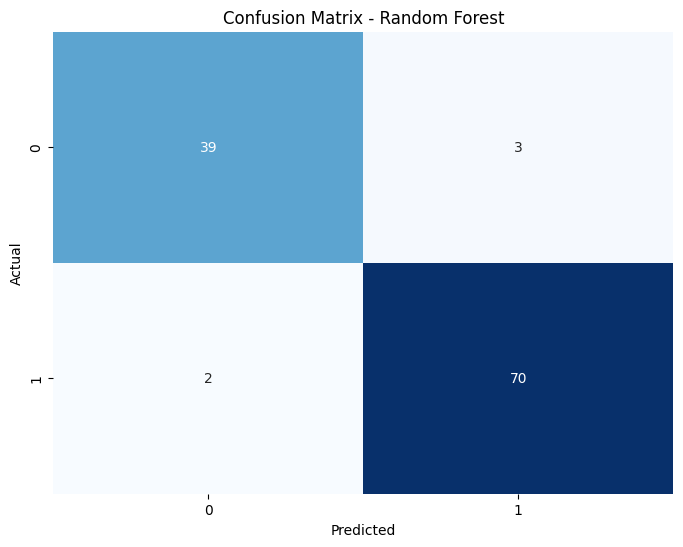

Результати оцінки моделей:


,Model,Accuracy,ROC AUC,R2 Score,MSE,MAE
0,Logistic Regression,0.982456,0.995370,0.924603,0.017544,0.017544
1,Decision Tree,0.921053,0.916336,0.660714,0.078947,0.078947
2,Random Forest,0.956140,0.993882,0.811508,0.043860,0.043860


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns # імпортуємо seaborn для візуалізації градієнтів
from IPython.core.display_functions import display
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score # імпортуємо модулі для розділення даних та крос-валідації
from sklearn.preprocessing import StandardScaler, LabelEncoder # імпортуємо модулі для масштабування та кодування міток
from sklearn.linear_model import LogisticRegression # імпортуємо логістичну регресію
from sklearn.tree import DecisionTreeClassifier # імпортуємо класифікатор дерев рішень
from sklearn.ensemble import RandomForestClassifier # імпортуємо випадковий ліс
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    roc_auc_score
)

# 1. Завантаження даних реальних пацієнтів з раком
print("Завантаження даних реальних пацієнтів з раком...")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Дані завантажено. Тренувальний набір: {X_train.shape[0]} записів, Тестовий набір: {X_test.shape[0]} записів.\n")

# 3. Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Список моделей для тренування
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. Тренування та оцінка моделей
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)


    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC AUC": roc,
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae
    })

    print("=" * 50)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Виведення матриці плутанини та звіту класифікації
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Виведення результатів
results_df = pd.DataFrame(results)
print("Результати оцінки моделей:")
display(results_df)




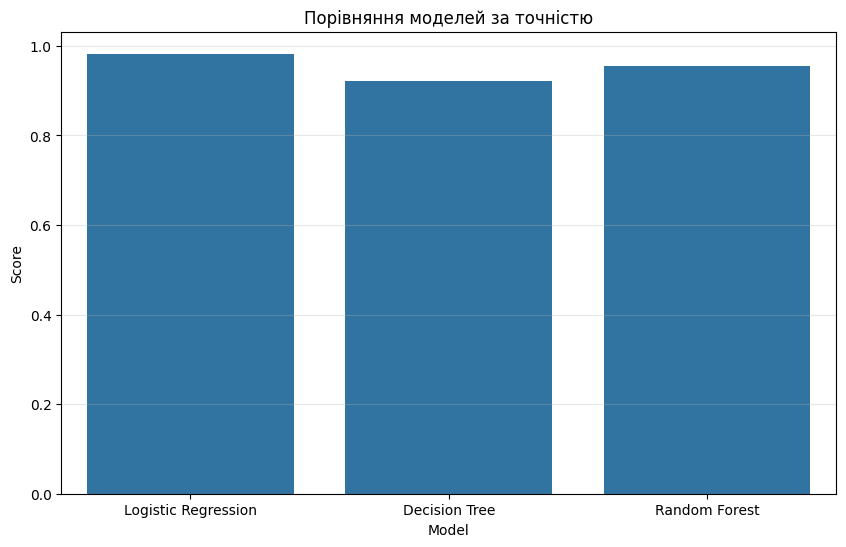

In [4]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Порівняння моделей за точністю")
plt.ylabel("Score")
plt.grid(axis="y", alpha=0.3)
plt.show()


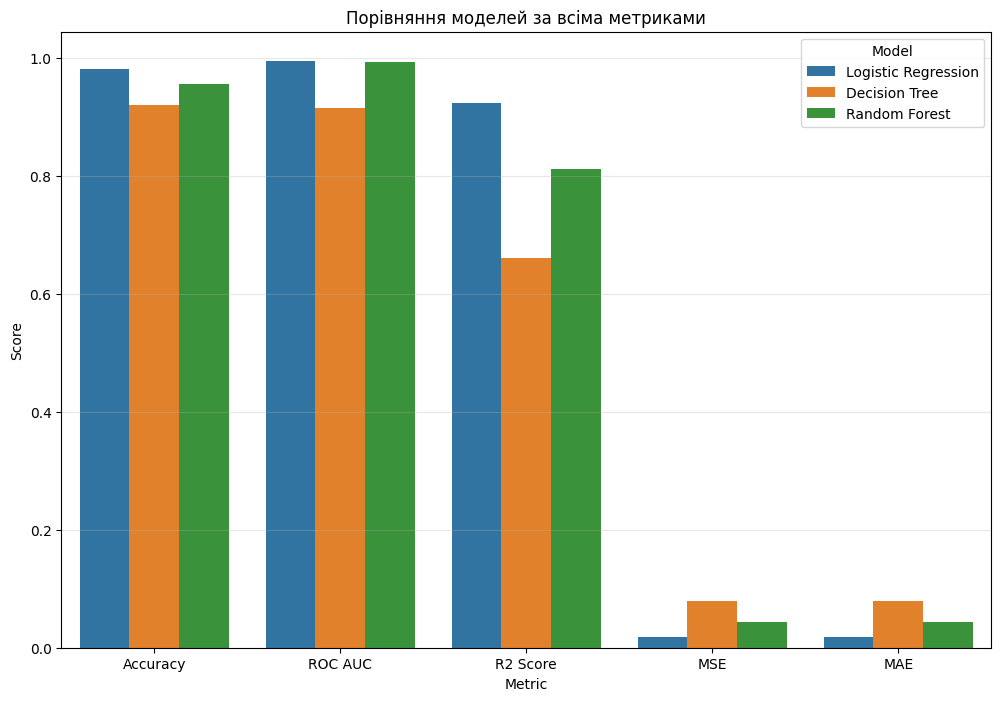

In [2]:
# візуалізація результатів всіх метрик для всіх моделей
metrics = ["Accuracy", "ROC AUC", "R2 Score", "MSE", "MAE"]
results_melted = results_df.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 8))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted)
plt.title("Порівняння моделей за всіма метриками")
plt.ylabel("Score")
plt.grid(axis="y", alpha=0.3)
plt.show()